## Importing Libs

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
#import soccerdata as sd
import re
from unidecode import unidecode
from scipy.spatial import ConvexHull
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import ax_text, fig_text


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils
import os
%load_ext autoreload
%autoreload 2

pd.set_option("display.max_rows", None, "display.max_columns", None)
background = "black"
text_color = 'black'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import matplotlib.font_manager as fm
from mplsoccer import FontManager

# Set the path to the locally downloaded font file
font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'

# Add the font to matplotlib
font_prop = fm.FontProperties(fname=font_path)

# You can now use this font in your plots
fm_sora = FontManager()
#fm_sora.prop = font_prop

print("Font loaded and registered successfully!")

Font loaded and registered successfully!


In [65]:
from sqlalchemy import create_engine
import psycopg2

# Database connection settings (replace with your credentials)
db_config = {
    'dbname': 'understat_shots_db',
    'user': 'ichadha',
    'password': 'ichadhapg',
    'host': 'localhost',
    'port': 5432,
}

# Create a connection engine
engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

## Shot of the Week

### Creating DataFrame

In [96]:
goal_low_xg = """select round("xG" :: numeric ,4) xg,"result",player,situation,h_team,a_team,league,h_a,"minute",date,player_assisted,"lastAction","X","Y"
from understat_shots_tb
where "date" > current_date - 7
and "result" = 'Goal'
order by "xG" 
limit 1;"""

with engine.connect() as conn:
    df_goal_low_xg = pd.read_sql(goal_low_xg, conn)

In [97]:
df_goal_low_xg

,xg,result,player,situation,h_team,a_team,league,h_a,minute,date,player_assisted,lastAction,X,Y
0,0.0204,Goal,Valentin Rongier,OpenPlay,Marseille,Le Havre,Ligue_1,h,24,2025-01-05 19:45:00,None,None,0.752,0.485


In [98]:
df_goal_low_xg['xGOT'] = 0.29
#df_goal_low_xg['score'] = '5:1'
#df_goal_low_xg['venueName'] = 'Thomas Léonard'
#df_goal_low_xg['second']

In [73]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/Matches/1824994/Live/France-Ligue-1-2024-2025-Marseille-Le-Havre"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: France, League: Ligue 1, Season: 2024/2025, Match Id: 1824994


In [74]:
events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Valentin Rongier')]

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,matchId,startDate,startTime,score,ftScore,htScore,etScore,venueName,maxMinute,playerId,playerName,endX,endY,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,blockedX,blockedY,isGoal,cardType,shotBodyType,situation,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotOpenPlay,shotCounter,shotSetPiece,shotDirectCorner,shotOffTarget,shotOnPost,shotOnTarget,shotsTotal,shotBlocked,shotRightFoot,shotLeftFoot,shotHead,shotObp,goalSixYardBox,goalPenaltyArea,goalObox,goalOpenPlay,goalCounter,goalSetPiece,penaltyScored,goalOwn,goalNormal,goalRightFoot,goalLeftFoot,goalHead,goalObp,shortPassInaccurate,shortPassAccurate,passCorner,passCornerAccurate,passCornerInaccurate,passFreekick,passBack,passForward,passLeft,passRight,keyPassLong,keyPassShort,keyPassCross,keyPassCorner,keyPassThroughball,keyPassFreekick,keyPassThrowin,keyPassOther,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,dribbleLost,dribbleWon,challengeLost,interceptionWon,clearanceHead,outfielderBlock,passCrossBlockedDefensive,outfielderBlockedPass,offsideGiven,offsideProvoked,foulGiven,foulCommitted,yellowCard,voidYellowCard,secondYellow,redCard,turnover,dispossessed,saveLowLeft,saveHighLeft,saveLowCentre,saveHighCentre,saveLowRight,saveHighRight,saveHands,saveFeet,saveObp,saveSixYardBox,savePenaltyArea,saveObox,keeperDivingSave,standingSave,closeMissHigh,closeMissHighLeft,closeMissHighRight,closeMissLeft,closeMissRight,shotOffTargetInsideBox,touches,assist,ballRecovery,clearanceEffective,clearanceTotal,clearanceOffTheLine,dribbleLastman,errorLeadsToGoal,errorLeadsToShot,intentionalAssist,interceptionAll,interceptionIntheBox,keeperClaimHighLost,keeperClaimHighWon,keeperClaimLost,keeperClaimWon,keeperOneToOneWon,parriedDanger,parriedSafe,collected,keeperPenaltySaved,keeperSaveInTheBox,keeperSaveTotal,keeperSmother,keeperSweeperLost,keeperMissed,passAccurate,passBackZoneInaccurate,passForwardZoneAccurate,passInaccurate,passAccuracy,cornerAwarded,passKey,passChipped,passCrossAccurate,passCrossInaccurate,passLongBallAccurate,passLongBallInaccurate,passThroughBallAccurate,passThroughBallInaccurate,passThroughBallInacurate,passFreekickAccurate,passFreekickInaccurate,penaltyConceded,penaltyMissed,penaltyWon,passRightFoot,passLeftFoot,passHead,sixYardBlock,tackleLastMan,tackleLost,tackleWon,cleanSheetGK,cleanSheetDL,cleanSheetDC,cleanSheetDR,cleanSheetDML,cleanSheetDMC,cleanSheetDMR,cleanSheetML,cleanSheetMC,cleanSheetMR,cleanSheetAML,cleanSheetAMC,cleanSheetAMR,cleanSheetFWL,cleanSheetFW,cleanSheetFWR,cleanSheetSub,goalConcededByTeamGK,goalConcededByTeamDL,goalConcededByTeamDC,goalConcededByTeamDR,goalConcededByTeamDML,goalConcededByTeamDMC,goalConcededByTeamDMR,goalConcededByTeamML,goalConcededByTeamMC,goalConcededByTeamMR,goalConcededByTeamAML,goalConcededByTeamAMC,goalConcededByTeamAMR,goalConcededByTeamFWL,goalConcededByTeamFW,goalConcededByTeamFWR,goalConcededByTeamSub,goalConcededOutsideBoxGoalkeeper,goalScoredByTeamGK,goalScoredByTeamDL,goalScoredByTeamDC,goalScoredByTeamDR,goalScoredByTeamDML,goalScoredByTeamDMC,goalScoredByTeamDMR,goalScoredByTeamML,goalScoredByTeamMC,goalScoredByTeamMR,goalScoredByTeamAML,goalScoredByTeamAMC,goalScoredByTeamAMR,goalScoredByTeamFWL,goalScoredByTeamFW,goalScoredByTeamFWR,goalScoredByTeamSub,aerialSuccess,duelAerialWon,duelAerialLost,offensiveDuel,defensiveDuel,bigChanceMissed,bigChanceScored,bigChanceCreated,overrun,successfulFinalThirdPasses,punches,penaltyShootoutScored,penaltyShootoutMissedOffTarget,penaltyShootoutSaved,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos
502,2.763846e+09,372,24,49.0,249,h,75.2,48.5,24,FirstHalf,Goal,Successful,"[{'type': 'OutOfBoxCentre'}, {'type': 'RightFo...","[touches, goalNormal, shotOnTarget, shotsTotal...",True,1824994,2025-01-05T00:00:00,2025-01-05T19:45:00,5 : 1,5 : 1,3 : 0,,Orange

In [99]:
player = 'Valentin Rongier'
df_goal_low_xg['goalMouthZ'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthZ'].iloc[0]
df_goal_low_xg['goalMouthY'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthY'].iloc[0]
df_goal_low_xg['second'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['second'].iloc[0]
df_goal_low_xg['score'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['score'].iloc[0]
df_goal_low_xg['venueName'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['venueName'].iloc[0]

### Plotting

In [77]:
df_goal_low_xg

,xg,result,player,situation,h_team,a_team,league,h_a,minute,date,player_assisted,lastAction,X,Y,xGOT,score,venueName,goalMouthZ,goalMouthY,second
0,0.0204,Goal,Valentin Rongier,OpenPlay,Marseille,Le Havre,Ligue_1,h,24,2025-01-05 19:45:00,None,None,0.752,0.485,0.29,5 : 1,Orange Vélodrome,3.8,54.1,49.0


In [62]:
df_goal_low_xg.columns

Index(['xg', 'result', 'player', 'situation', 'h_team', 'a_team', 'league',
       'h_a', 'minute', 'date', 'player_assisted', 'lastAction', 'X', 'Y',
       'xGOT', 'goalMouthZ', 'goalMouthY', 'second', 'score', 'venueName'],
      dtype='object')

In [504]:
df_goal_low_xg['date'].iloc[0].date()

datetime.date(2024, 12, 14)

In [100]:
def plot_goal_low_xg(df):
    teamcolor = '#4dc3ff'
    #background = 'green'
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100
    
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'box',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(9, 12))
    fig.patch.set_facecolor(background)

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.29, 
        y=.9, 
        s='Shot Of The Week', 
        fontsize=28, 
        fontproperties=font_prop,  
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.32, 
        y=0.6, 
        s=f"Match - {df['h_team'].iloc[0]} v {df['a_team'].iloc[0]} ({df['league'].iloc[0]})", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.21, 
        y=0.4, 
        s=f"Date - {df['date'].iloc[0].date()}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    
    ax1.text(
        x=0.815, 
        y=.6, 
        s=f"Time - {df['minute'].iloc[0]} : {df['second'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.25, 
        y=.2, 
        s=f"Player - {df['player'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center'
    )

    ax1.text(
        x=0.8, 
        y=.4, 
        s=f"Final Score - {df['score'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

    ax_image = add_image(
        logo, fig, left=0.82, bottom=0.85, width=0.08, height=0.08,aspect='equal'
    )
    

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    pitch.scatter(
        df['X'].iloc[0], 
        df['Y'].iloc[0], 
        s=50000 * df['xg'].iloc[0], 
        c=background,
        marker='football',
        ax=ax2,
        alpha=.7,
        linewidths=.8,
        edgecolors=teamcolor
    )
    pitch.annotate(f"xG - {df['xg'].iloc[0]}",
        xy=(df['X'].iloc[0],df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )
    pitch.annotate(f"xGOT - {df['xGOT'].iloc[0]}",
        xy=(df['X'].iloc[0]-5,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.annotate(f"Situation - {df['situation'].iloc[0]}",
        xy=(df['X'].iloc[0]-10,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.arrows(
        df['X'].iloc[0], df['Y'].iloc[0],105,34,
        width=1.5,alpha=0.8,zorder=3,
        headwidth=8, headlength=5, color='white',
        ax=ax2
    )

    

        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, 0.2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    
    ax3.text(
        x=0.1, 
        y=0, 
        s=f"Assisted By : {df['player_assisted'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.7, 
        y=0, 
        s=f"Last Action : {df['lastAction'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )
    

    ax3.set_axis_off()

    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/ShotOfTheWeek.png',dpi=500,bbox_inches = 'tight',facecolor=background)


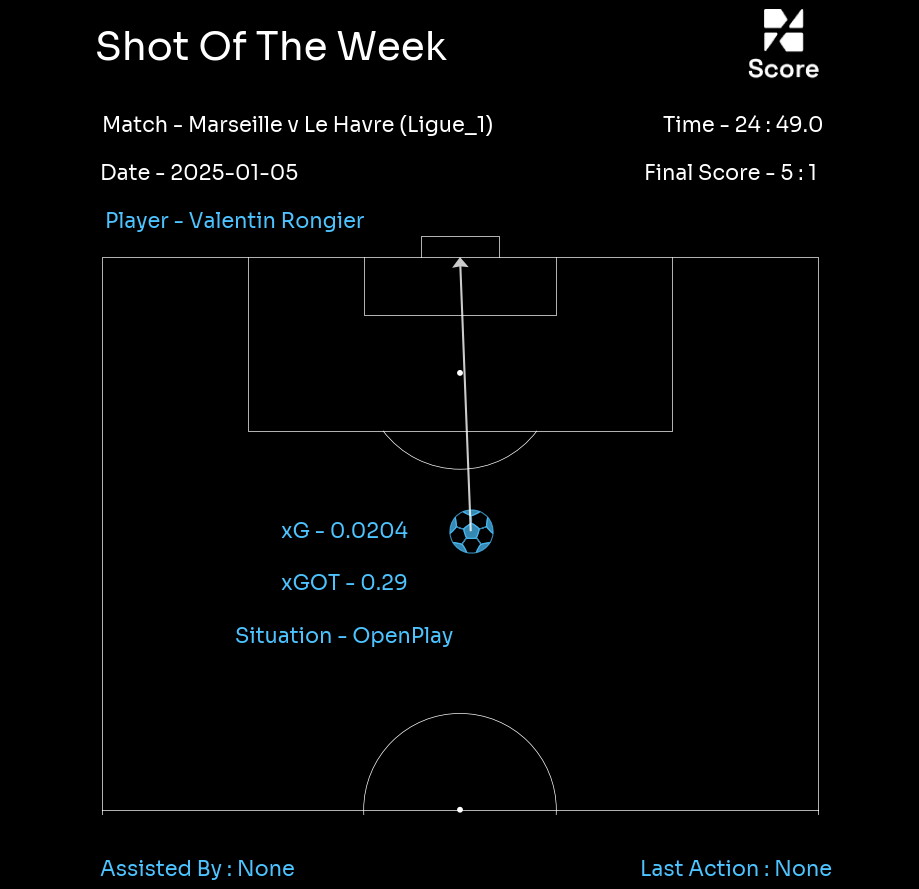

In [101]:
plot_goal_low_xg(df_goal_low_xg)

## Miss of the Week

### Creating DataFrame

In [102]:
miss_high_xg = """select round("xG" :: numeric ,4) xg,"result",player,situation,h_team,a_team,league,h_a,"minute",date,player_assisted,"lastAction","X","Y"
from understat_shots_tb
where "date" > current_date - 7
and "result" != 'Goal' and situation != 'Penalty'
order by "xG" desc 
limit 1;"""

with engine.connect() as conn:
    df_miss_high_xg = pd.read_sql(miss_high_xg, conn)

In [107]:
df_miss_high_xg

,xg,result,player,situation,h_team,a_team,league,h_a,minute,date,player_assisted,lastAction,X,Y
0,0.9491,ShotOnPost,Morten Thorsby,OpenPlay,Lecce,Genoa,Serie_A,a,42,2025-01-05 14:00:00,Vitinha,Pass,0.983,0.503


In [105]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/Matches/1835184/Live/Italy-Serie-A-2024-2025-Lecce-Genoa"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Italy, League: Serie A, Season: 2024/2025, Match Id: 1835184


In [110]:
events_df['type'].unique()

array(['Start', 'Pass', 'Clearance', 'BallRecovery', 'TakeOn',
       'Challenge', 'BlockedPass', 'Dispossessed', 'Tackle', 'Aerial',
       'BallTouch', 'Foul', 'Interception', 'KeeperSweeper', 'SavedShot',
       'Save', 'CornerAwarded', 'Error', 'ShotOnPost', 'MissedShots',
       'KeeperPickup', 'End', 'SubstitutionOff', 'SubstitutionOn',
       'ShieldBallOpp', 'OffsideGiven', 'OffsidePass', 'OffsideProvoked',
       'FormationChange', 'Claim', 'Card', 'FormationSet'], dtype=object)

In [109]:
player

'Morten Thorsby'

In [111]:
player = df_miss_high_xg['player'].iloc[0]
minute = df_miss_high_xg['minute'].iloc[0]

df_miss_high_xg['goalMouthZ'] = events_df[(events_df['type'] == 'ShotOnPost') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['goalMouthZ'].iloc[0]
df_miss_high_xg['goalMouthY'] = events_df[(events_df['type'] == 'ShotOnPost') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['goalMouthY'].iloc[0]
df_miss_high_xg['second'] = events_df[(events_df['type'] == 'ShotOnPost') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['second'].iloc[0]
df_miss_high_xg['score'] = events_df[(events_df['type'] == 'ShotOnPost') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['score'].iloc[0]
df_miss_high_xg['venueName'] =events_df[(events_df['type'] == 'ShotOnPost') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['venueName'].iloc[0]


In [112]:
df_miss_high_xg

,xg,result,player,situation,h_team,a_team,league,h_a,minute,date,player_assisted,lastAction,X,Y,goalMouthZ,goalMouthY,second,score,venueName
0,0.9491,ShotOnPost,Morten Thorsby,OpenPlay,Lecce,Genoa,Serie_A,a,42,2025-01-05 14:00:00,Vitinha,Pass,0.983,0.503,39.2,51.9,44.0,0 : 0,Stadio Ettore Giardiniero - Via del Mare


### Plotting

In [128]:
def plot_miss_high_xg(df):
    teamcolor = '#ad1919'
    #background = 'green'
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100
    
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'box',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(9, 12))
    fig.patch.set_facecolor(background)

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.29, 
        y=.9, 
        s='Miss Of The Week', 
        fontsize=28, 
        fontproperties=font_prop,  
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.3, 
        y=0.6, 
        s=f"Match - {df['h_team'].iloc[0]} v {df['a_team'].iloc[0]} ({df['league'].iloc[0]})", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    
    ax1.text(
        x=0.815, 
        y=.6, 
        s=f"Time - {df['minute'].iloc[0]} : {df['second'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.22, 
        y=0.4, 
        s=f"Date - {df['date'].iloc[0].date()}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.25, 
        y=.2, 
        s=f"Player - {df['player'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center'
    )

    ax1.text(
        x=0.8, 
        y=.4, 
        s=f"Final Score - {df['score'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

    ax_image = add_image(
        logo, fig, left=0.82, bottom=0.85, width=0.08, height=0.08,aspect='equal'
    )
    

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    pitch.scatter(
        df['X'].iloc[0], 
        df['Y'].iloc[0], 
        s=1000 * df['xg'].iloc[0], 
        color=teamcolor,
        marker='o',
        ax=ax2,
        alpha=.7,
        linewidths=.8,
        edgecolor='white'
    )
    pitch.annotate(f"xG - {df['xg'].iloc[0]}",
        xy=(df['X'].iloc[0]-18,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.annotate(f"Situation - {df['situation'].iloc[0]}",
        xy=(df['X'].iloc[0]-23,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )
    pitch.annotate(f"Result - {df['result'].iloc[0]}",
        xy=(df['X'].iloc[0]-28,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    

        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, 0.2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.1, 
        y=0, 
        s=f"Assisted By : {df['player_assisted'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.68, 
        y=0, 
        s=f"Last Action : {df['lastAction'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )


    ax3.set_axis_off()
    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/MissOfTheWeek.png',dpi=500,bbox_inches = 'tight',facecolor=background)



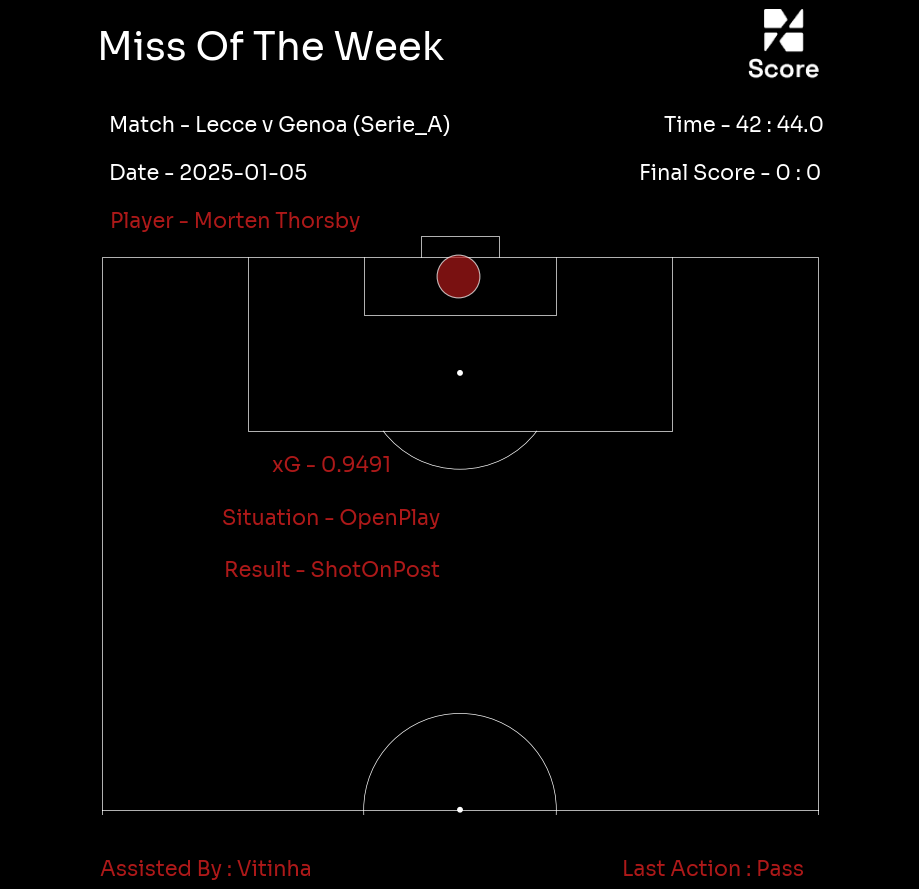

In [129]:
df_miss_high_xg1 = df_miss_high_xg.copy()
plot_miss_high_xg(df_miss_high_xg1)

## Goal Of the Week

## ShotMaps

### Top 9 Players Based on Number oof Shots Across Top 5 Leagues

In [5]:
query = """select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_shots desc
limit 9;"""

with engine.connect() as conn:
    df_stats = pd.read_sql(query, conn)

In [8]:
df_stats

,player,num_shots,num_shots_on_target,num_goals,num_goals_non_penalty,total_xg,total_npxg,team
0,Kylian Mbappe-Lottin,74,37,10,7,13.16,10.20,Real Madrid
1,Erling Haaland,72,40,13,12,14.71,13.95,Man City
2,Antoine Semenyo,68,20,5,5,6.91,6.91,Bournemouth
3,Nikola Krstovic,64,21,4,3,6.55,5.03,Lecce
4,Omar Marmoush,64,31,13,11,9.36,7.84,Frankfurt
5,Robert Lewandowski,64,36,16,14,17.79,15.57,Barcelona
6,Raphinha,61,29,11,10,11.27,10.53,Barcelona
7,Valentín Castellanos,60,25,7,5,10.88,8.60,Lazio
8,Cole Palmer,59,25,11,8,9.10,6.82,Chelsea


In [7]:
df_stats['team'] = ['Real Madrid','Man City','Bournemouth','Lecce','Frankfurt','Barcelona','Barcelona','Lazio','Chelsea']

In [9]:
query_shots = """ select "result","X","Y",situation,"shotType",player from understat_shots_tb ust
where season = '2024' and 
player in (select player from

(select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_shots desc
limit 9) players);"""

with engine.connect() as conn:
    df_shots = pd.read_sql(query_shots, conn)

In [10]:
df_shots['player'].value_counts()

player
Kylian Mbappe-Lottin    74
Erling Haaland          72
Antoine Semenyo         68
Robert Lewandowski      64
Omar Marmoush           64
Nikola Krstovic         64
Raphinha                61
Valentín Castellanos    60
Cole Palmer             59
Name: count, dtype: int64

In [11]:
df = df_shots.copy()
df['X'] = (df['X'] / 100) * 105 * 100
df['Y'] = (df['Y'] / 100) * 68 * 100

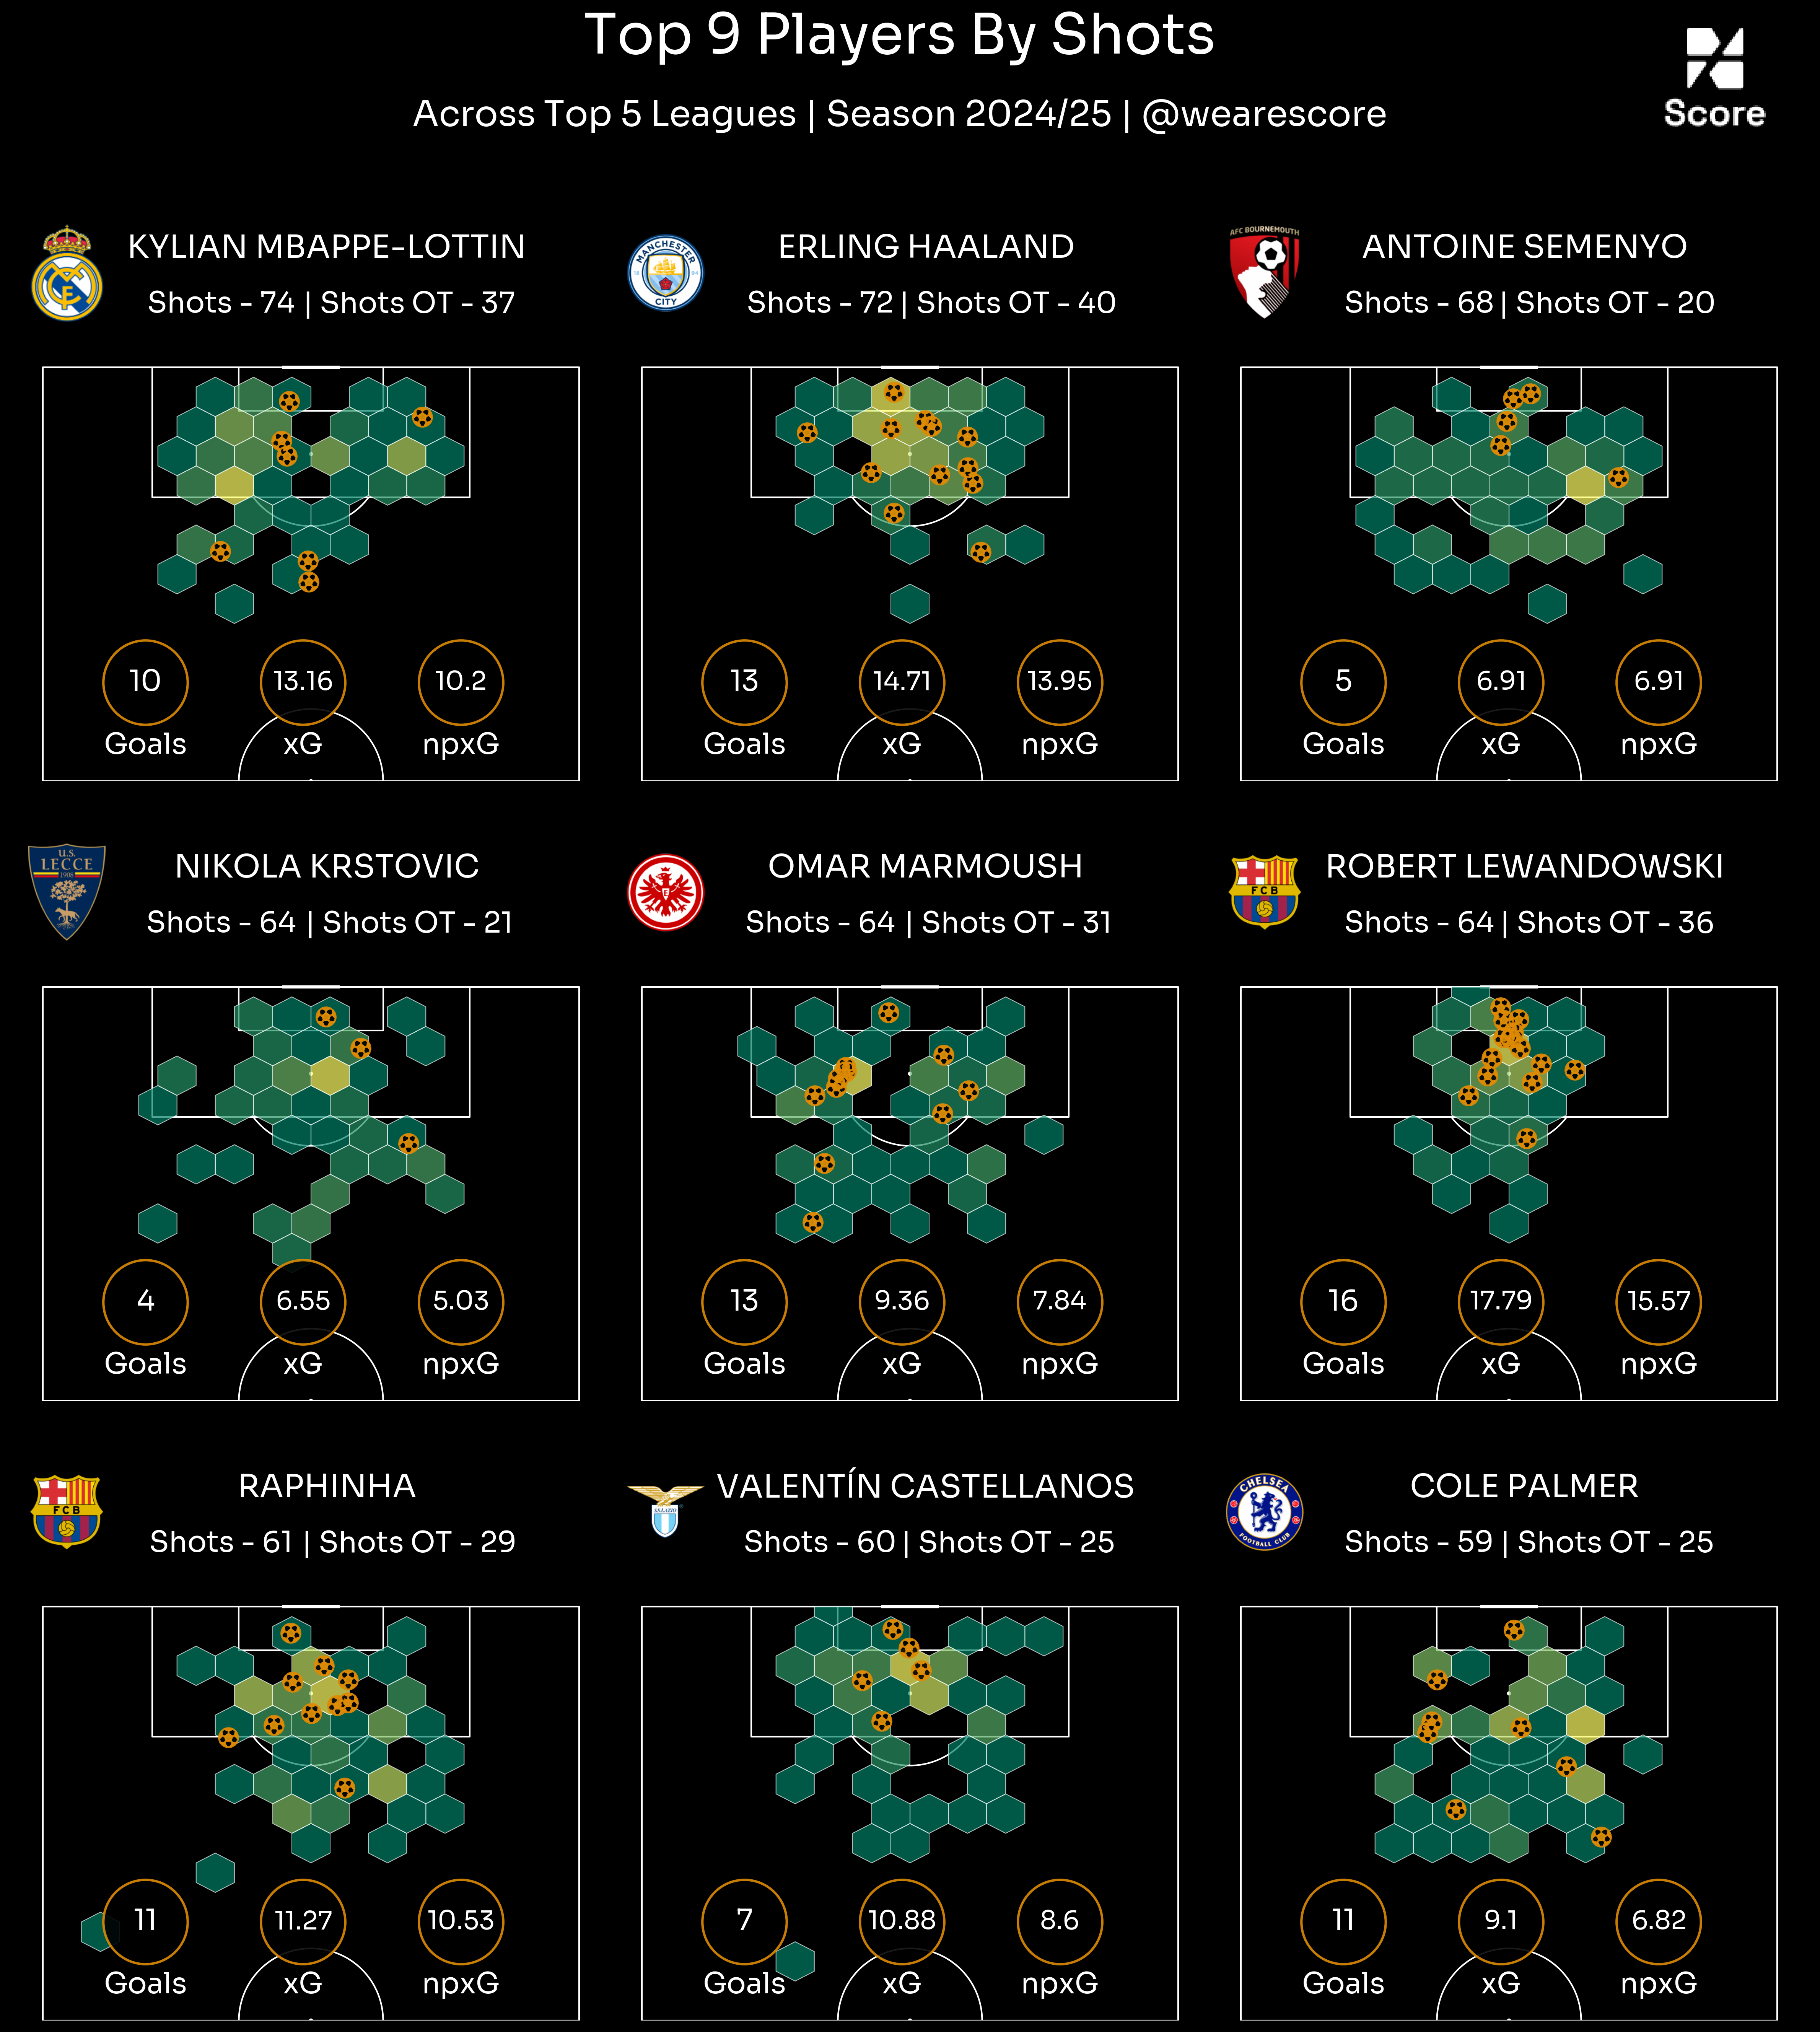

In [14]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

zoom_factor = 0.15

plt.rcParams['hatch.linewidth'] = 0.02
plt.rcParams['font.family'] = 'serif'
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18,30), dpi=300)
axs = axs.flatten()  # Flatten the axis array for easy iteration

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.88, bottom=0.75, width=0.05, height=0.05,aspect='equal'
)

img_url = 'C:\\Users\\acer\\Documents\\GitHub\\IndianCitizen\\ScorePredict\\Images\\TeamLogos'
for index, ax in enumerate(axs):
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'line',
    half=True, 
    pitch_color=background, 
    stripe=False, 
    line_color='white',
    linewidth=1,
    line_zorder=2,pad_bottom=0, pad_top=20
    )
    pitch.draw(ax=ax)

    ax.annotate(text=f"{df_stats['player'].iloc[index].upper()}", xy=(32, 120), size=20, color='white', ha='center', va='center', font=font_prop)
    team_name = df_stats['team'].iloc[index]
    img = plt.imread(f"{img_url}\\{team_name}.png")  # Adjust file path as needed
    im = OffsetImage(img, zoom=0.35)  # Adjust zoom for size
    ab = AnnotationBbox(
        im, 
        (65, 117),  # Adjust coordinates for image placement
        frameon=False,
        xycoords='data'
    )
    ax.add_artist(ab)
    
    
    ax.annotate(text=f"Shots - {df_stats['num_shots'].iloc[index]} ", xy=(45, 113), size=18, color='white', ha='center', va='center', font=font_prop)

    ax.annotate(text=f" | Shots OT - {df_stats['num_shots_on_target'].iloc[index]}", xy=(22, 113), size=18, color='white', ha='center', va='center', font=font_prop)

    player_shots = df[df['player'] == df_stats['player'].iloc[index]]

    if not player_shots.empty:
        # Plot hexbin for the player's shots
        pitch.hexbin(
            player_shots.X, 
            player_shots.Y, 
            ax=ax, 
            edgecolors='white',
            gridsize=(14, 14), 
            cmap='summer', 
            alpha=0.7, 
            zorder=3
        )

    player_goals = player_shots[(player_shots['result'] == 'Goal') & (player_shots['situation'] != 'Penalty')]
    pitch.scatter(player_goals.X, player_goals.Y,s=150, ax=ax, zorder=4, edgecolors='#DE8A04',marker='football',
                          alpha=0.9, linewidths=1.2, c=background)

    pitch.scatter(65, 55,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)
    pitch.scatter(65, 35,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)
    pitch.scatter(65, 15,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)

    pitch.annotate(text=f"{df_stats['num_goals'].iloc[index]}",ax=ax, xy=(65, 55), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="Goals",ax=ax, xy=(57, 55), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)

    pitch.annotate(text=f"{df_stats['total_xg'].iloc[index]}",ax=ax, xy=(65, 35), size=16, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="xG",ax=ax, xy=(57, 35), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)

    pitch.annotate(text=f"{df_stats['total_npxg'].iloc[index]}",ax=ax, xy=(65, 15), size=16, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="npxG",ax=ax, xy=(57, 15), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)


    
    

fig.patch.set_facecolor(background)
plt.subplots_adjust(wspace=0, hspace=-0.6)

fig.text(x=0.51, y=0.78, s=f"Top 9 Players By Shots", va="bottom", ha="center",
             fontsize=35, color="white", font=font_prop, weight="bold")
fig.text(x=0.51, y=0.76, s=f"Across Top 5 Leagues | Season 2024/25 | @wearescore",color="white",
         va="bottom", ha="center", fontsize=22, font=font_prop)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Top9Europe.png',dpi=500,bbox_inches = 'tight',facecolor=background)


In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cmr.amber', 'cmr.amber_r', 'cmr.amethyst', 'cmr.amethyst_r', 'cmr.apple', 'cmr.apple_r', 'cmr.arctic', 'cmr.arctic_r', 'cmr.bubblegum', 'cmr.bubblegum_r', 'cmr.chroma', 'cmr.chroma_r', 'cmr.copper', 'cmr.copper_r', 'cmr.copper_s', 'cmr.copper_s_r', 'cmr.cosmic', 'cmr.cosmic_r', 'cmr.dusk', 'cmr.dusk_r', 'cmr.eclipse', 'cmr.eclipse_r', 'cmr.ember', 'cmr.ember_r', 'cmr.emerald', 'cmr.emerald_r', 'cmr.emergency', 'cmr.emergency_r', 'cmr.emergency_s', 'cmr.emergency_s_r', 'cmr.fall', 'cmr.fall_r', 'cmr.flamingo', 'cmr.flamingo_r', 'cmr.freeze', 'cmr.freeze_r', 'cmr.fusion', 'cmr.fusion_r', 'cmr.gem', 'cmr.gem_r', 'cmr.ghostlight', 'cmr.ghostlight_r', 'cmr.gothic', 'cmr.gothic_r', 'cmr.guppy', 'cmr.guppy_r', 'cmr.holly', 'cmr.holly_r', 'cmr.horizon', 'cmr.horizon_r', 'cmr.iceburn', 'cmr.iceburn_r', 'cmr.infinity', 'cmr.infinity_r', 'cmr.infinity_s', 'cmr.infinity_s_r', 'cmr.jungle', 'cmr.jungle_r', 'cmr.lavender', 'cmr.lavender_r', 'cmr.lilac', 'cmr.lilac_r', 'cmr.neon', 'cmr.neon_r', 'cmr.neutral', 'cmr.neutral_r', 'cmr.nuclear', 'cmr.nuclear_r', 'cmr.ocean', 'cmr.ocean_r', 'cmr.pepper', 'cmr.pepper_r', 'cmr.pride', 'cmr.pride_r', 'cmr.prinsenvlag', 'cmr.prinsenvlag_r', 'cmr.rainforest', 'cmr.rainforest_r', 'cmr.redshift', 'cmr.redshift_r', 'cmr.sapphire', 'cmr.sapphire_r', 'cmr.savanna', 'cmr.savanna_r', 'cmr.seasons', 'cmr.seasons_r', 'cmr.seasons_s', 'cmr.seasons_s_r', 'cmr.seaweed', 'cmr.seaweed_r', 'cmr.sepia', 'cmr.sepia_r', 'cmr.sunburst', 'cmr.sunburst_r', 'cmr.swamp', 'cmr.swamp_r', 'cmr.torch', 'cmr.torch_r', 'cmr.toxic', 'cmr.toxic_r', 'cmr.tree', 'cmr.tree_r', 'cmr.tropical', 'cmr.tropical_r', 'cmr.viola', 'cmr.viola_r', 'cmr.voltage', 'cmr.voltage_r', 'cmr.waterlily', 'cmr.waterlily_r', 'cmr.watermelon', 'cmr.watermelon_r', 'cmr.wildfire', 'cmr.wildfire_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

## Scatter Plots for Different Metrics

In [526]:
#https://x.com/DataAnalyticEPL/status/1869757409042006186

## Radar / Pizza Plots

In [2]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.image as mpimg

font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')
img1 = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/Images/Players/AK.jpg')

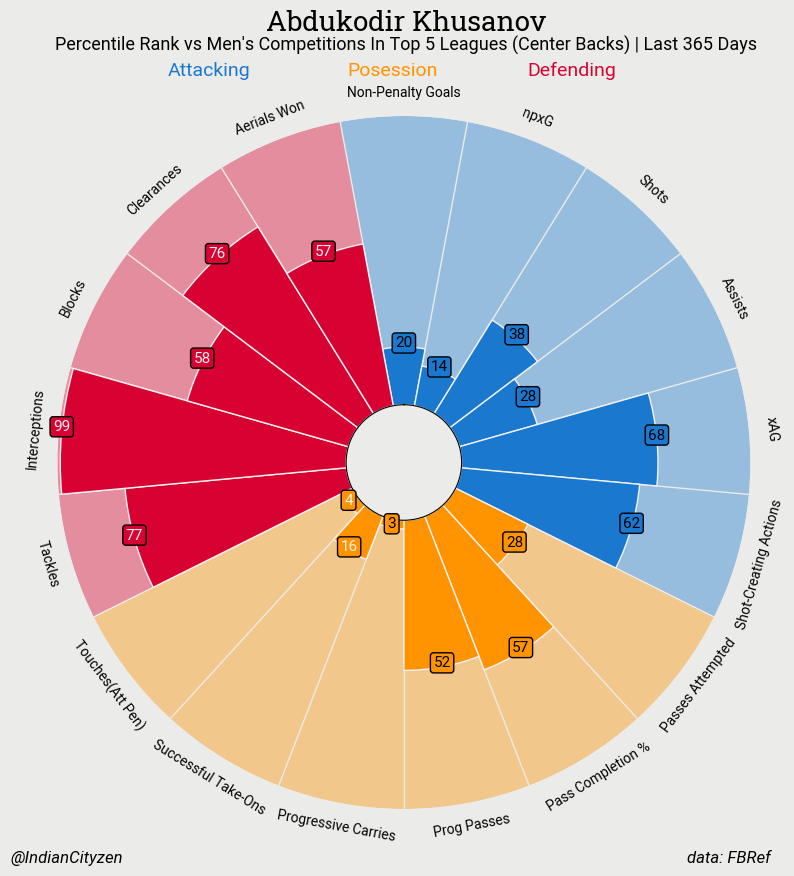

In [4]:
# parameter list
params = ["Non-Penalty Goals", "npxG", "Shots", "Assists", "xAG","Shot-Creating Actions",
          "Passes Attempted","Pass Completion %", "Prog Passes", "Progressive Carries", "Successful Take-Ons","Touches(Att Pen)",
          "Tackles","Interceptions","Blocks","Clearances","Aerials Won"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [
    20, 14, 38, 28, 68,62,
    28, 57, 52, 3, 16,4,
    77, 99, 58, 76, 57
]

# color for the slices and text
slice_colors = ["#1A78CF"] * 6 + ["#FF9300"] * 6 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 7

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(9, 9),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=10,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Abdukodir Khusanov", size=20,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs Men's Competitions In Top 5 Leagues (Center Backs) | Last 365 Days",
    size=13,
    ha="center", fontproperties=font_normal.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: FBRef"

fig.text(
    0.92, 0.05, f"{CREDIT_1}", size=12,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

fig.text(
    0.2, 0.05, f"@IndianCityzen", size=12,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.25, 0.925, "Attacking", size=14,
    fontproperties=font_normal.prop, color="#1a78cf"
)

fig.text(
    0.45, 0.925, "Posession", size=14,
    fontproperties=font_normal.prop, color="#ff9300"
)

fig.text(
    0.65, 0.925, "Defending", size=14,
    fontproperties=font_normal.prop, color="#d70232"
)

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/PlayerReports/AK.png',dpi=500,bbox_inches = 'tight',facecolor="#EBEBE9")

## xG For V xG Against Time Series Plot

In [185]:
query = """WITH team_shots AS (
    SELECT 
        h_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_sum
    FROM understat_shots_tb
    WHERE league = 'EPL' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'h'
    GROUP BY h_team, match_id, season, date
    
    UNION
    
    SELECT 
        a_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_sum
    FROM understat_shots_tb
    WHERE league = 'EPL' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'a'
    GROUP BY a_team, match_id, season, date
),
team_shots_against AS (
    SELECT 
        a_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_against_sum
    FROM understat_shots_tb
    WHERE league = 'EPL' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'h'
    GROUP BY a_team, match_id, season, date
    
    UNION
    
    SELECT 
        h_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_against_sum
    FROM understat_shots_tb
    WHERE league = 'EPL' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'a'
    GROUP BY h_team, match_id, season, date
),
team_matches AS (
    SELECT 
        shots.team,
        shots.season,
        shots.match_id,
        shots.date,
        shots.xg_sum,
        COALESCE(against.xg_against_sum, 0) AS xg_against_sum,
        ROW_NUMBER() OVER (PARTITION BY shots.team, shots.season ORDER BY shots.date) AS match_number
    FROM team_shots AS shots
    LEFT JOIN team_shots_against AS against
        ON shots.team = against.team AND shots.match_id = against.match_id
),
rolling_xg AS (
    SELECT 
        team,
        season,
        match_id,
        date,
        match_number,
        xg_sum,
        xg_against_sum,
        SUM(xg_sum) OVER (PARTITION BY team, season ORDER BY match_number ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS rolling_xg,
        SUM(xg_against_sum) OVER (PARTITION BY team, season ORDER BY match_number ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS rolling_xg_against
    FROM team_matches
)
SELECT 
    team,
    season,
    --match_id,
    date,
    xg_sum AS xg_per_game,            -- Sum of xG for the current game
    xg_against_sum AS xg_against_per_game, -- Sum of xG conceded for the current game
    rolling_xg,                       -- Rolling sum of xG over 10 games
    rolling_xg_against,                -- Rolling sum of xG conceded over 10 games
    rolling_xg - rolling_xg_against as rolling_diff
FROM rolling_xg
ORDER BY team, season, date;"""

with engine.connect() as conn:
    df_xg = pd.read_sql(query, conn)

In [186]:
df_xg['team'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Ipswich', 'Leeds', 'Leicester', 'Liverpool', 'Luton',
       'Manchester City', 'Manchester United', 'Newcastle United',
       'Norwich', 'Nottingham Forest', 'Sheffield United', 'Southampton',
       'Tottenham', 'Watford', 'West Ham', 'Wolverhampton Wanderers'],
      dtype=object)

In [194]:
df_team = df_xg[df_xg['team'] == 'Nottingham Forest']

In [23]:
top_9_cm = {
    'Liverpool': {
        'low': '#00B2A9',
        'high': '#c8102E'
    },
    
    'Arsenal': {
        'low':'#FFFFFF',
        'high':'#EF0107'
    },
    'Nottingham Forest': {
        'low': 'green',
        'high': '#EF0107'
    },
    'Chelsea': {
        'low': '#dba111',
        'high': '#034694'
    },
    'Newcastle United': {
        'low': '#41B6E6',
        'high': '#FFFFFF'
    },
    
    'Manchester City':{
        'low':'#1C2C5B',
        'high':'#6CABDD'
    },
    'Bournemouth':{
        'low':'#EFDBB2',
        'high':'#DA291C'
    },
    'Fulham':{
        'low':'#CC0000',
        'high':'#FFFFFF'
    },
    'Aston Villa':{
        'low':'#95bfe5',
        'high':'#670e36'
    },
}

In [197]:
df_team.tail(10)

,team,season,date,xg_per_game,xg_against_per_game,rolling_xg,rolling_xg_against,rolling_diff
2093,Nottingham Forest,2024,2024-11-02 15:00:00,2.350108,0.132317,16.680885,11.488975,5.191910
2094,Nottingham Forest,2024,2024-11-10 14:00:00,1.178519,1.922949,16.574608,11.502774,5.071833
2095,Nottingham Forest,2024,2024-11-23 15:00:00,0.403136,1.676884,14.060689,12.964706,1.095983
2096,Nottingham Forest,2024,2024-11-30 15:00:00,1.765873,0.462771,14.415875,12.324393,2.091482
2097,Nottingham Forest,2024,2024-12-04 19:30:00,0.802155,3.223611,14.628498,14.377563,0.250935
2098,Nottingham Forest,2024,2024-12-07 17:30:00,0.652800,1.662318,13.912068,14.471522,-0.559454
2099,Nottingham Forest,2024,2024-12-14 17:30:00,2.287121,0.389423,15.582887,13.421129,2.161759
2100,Nottingham Forest,2024,2024-12-21 15:00:00,0.964897,0.769004,14.881246,11.907561,2.973685
2101,Nottingham Forest,2024,2024-12-26 15:00:00,1.316297,1.057578,14.306143,12.129271,2.176872
2102,Nottingham Forest,2024,2024-12-29 15:00:00,2.174932,0.615191,13.895838,11.912046,1.983791


In [198]:
# Sort the dataframe by date
df_team = df_team.sort_values(by='date')

# Assign match numbers
df_team['Match Number'] = range(1, len(df_team) + 1)

# Reset the index (optional)
df_team = df_team.reset_index(drop=True)

In [199]:
df_team.columns

Index(['team', 'season', 'date', 'xg_per_game', 'xg_against_per_game',
       'rolling_xg', 'rolling_xg_against', 'rolling_diff', 'Match Number'],
      dtype='object')

In [201]:
38*3

114

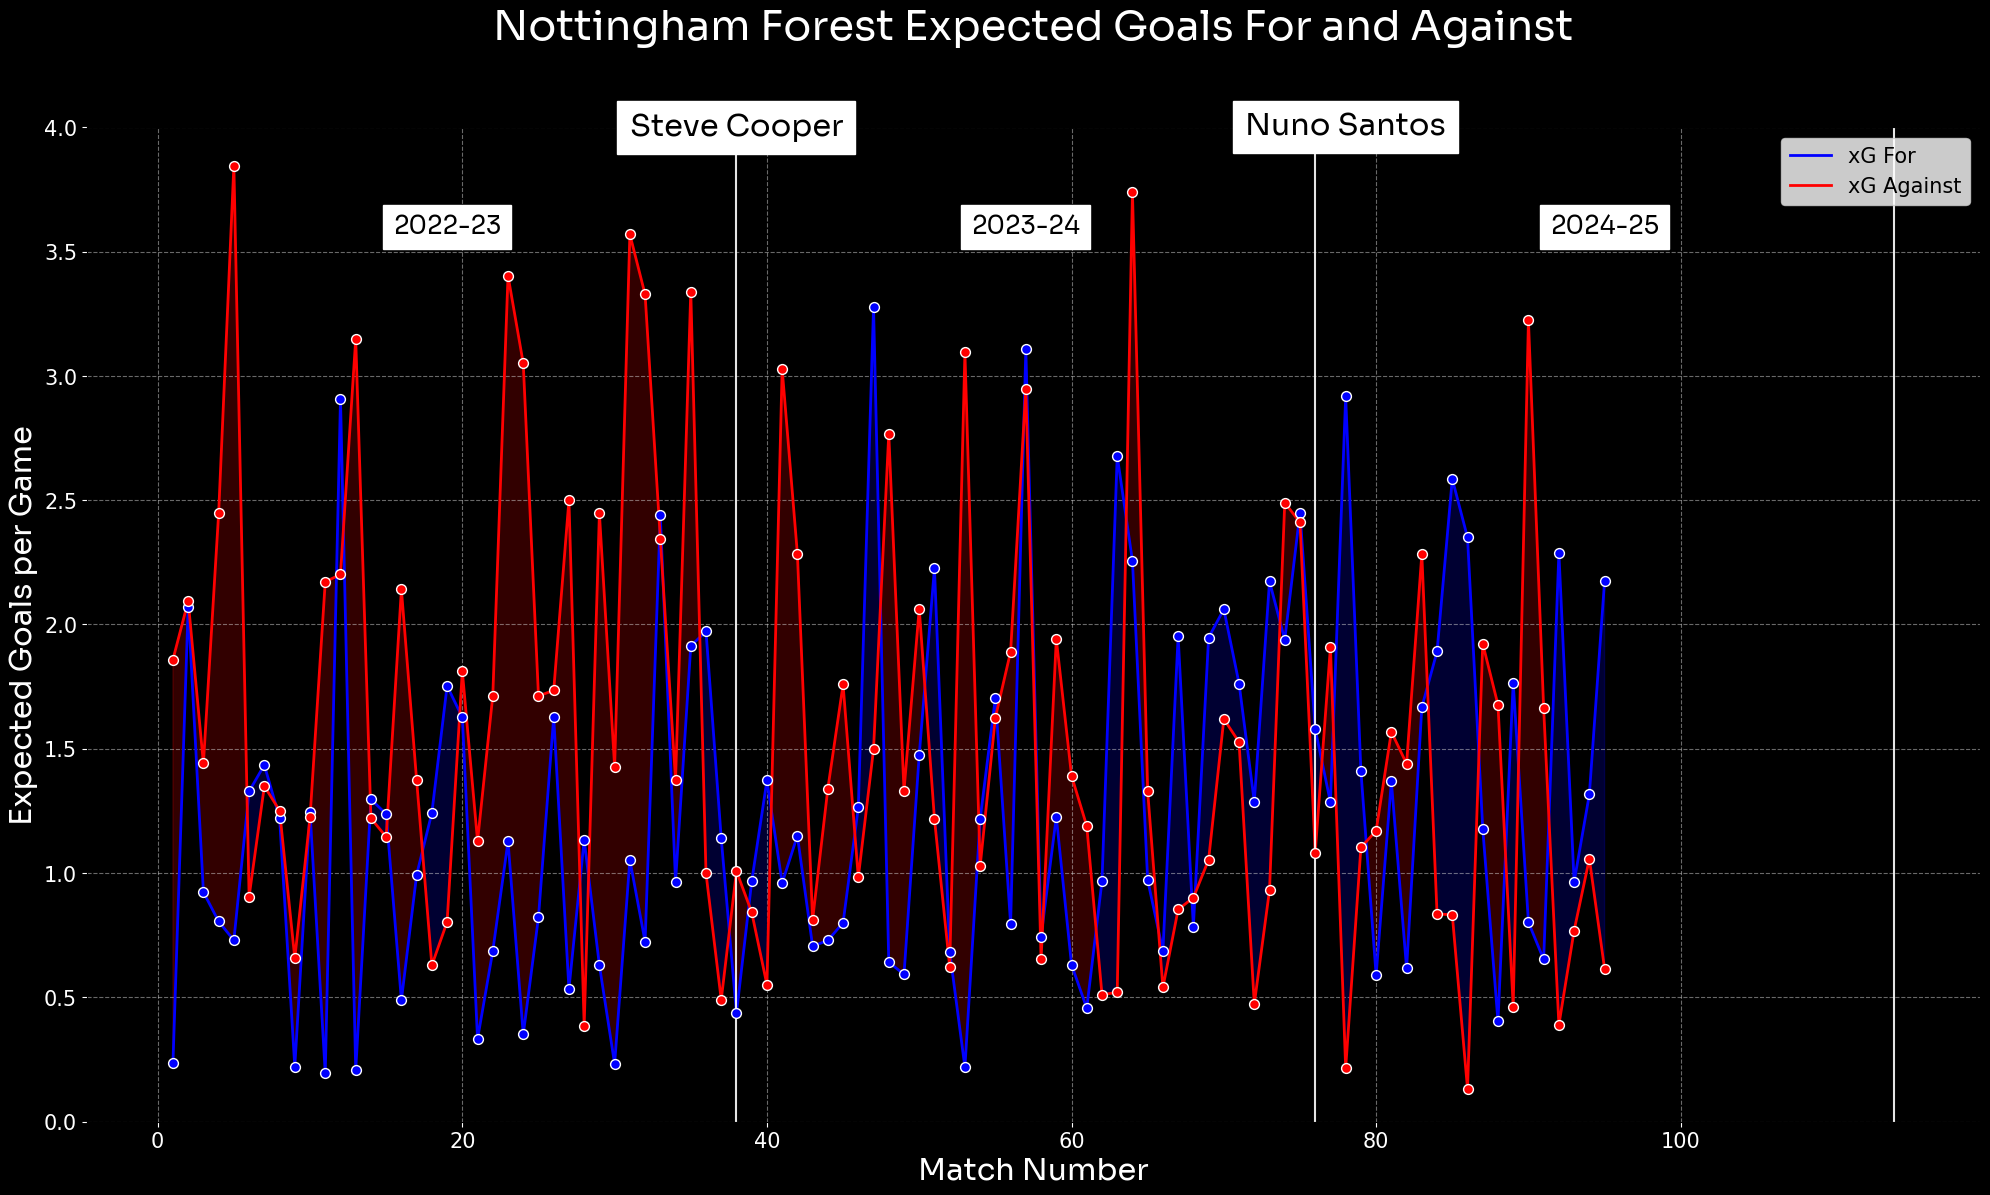

In [229]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(20, 12))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)
# Plot xG For and Against
ax.plot(df_team['Match Number'], df_team['xg_per_game'], label='xG For', color='blue', lw=2)
ax.plot(df_team['Match Number'], df_team['xg_against_per_game'], label='xG Against', color='red', lw=2)

# Shaded area between xG For and Against
ax.fill_between(df_team['Match Number'], df_team['xg_per_game'], df_team['xg_against_per_game'],
                where=(df_team['xg_per_game'] > df_team['xg_against_per_game']), interpolate=True, color='blue', alpha=0.2)
ax.fill_between(df_team['Match Number'], df_team['xg_per_game'], df_team['xg_against_per_game'],
                where=(df_team['xg_per_game'] <= df_team['xg_against_per_game']), interpolate=True, color='red', alpha=0.2)


# Scatter points for actual xG For and xG Against
ax.scatter(df_team['Match Number'], df_team['xg_per_game'], color='blue', edgecolors='white', s=50, zorder=3)
ax.scatter(df_team['Match Number'], df_team['xg_against_per_game'], color='red', edgecolors='white', s=50, zorder=3)

# Add vertical lines and season annotations
season_splits = [38, 76, 114]  # Match numbers where seasons end
seasons = ['2022-23','2023-24','2024-25']
for i, split in enumerate(season_splits):
    ax.axvline(split, color='white', linestyle='-', alpha=0.9)
    ax.text(split - 19, 3.6, seasons[i], color='black', backgroundcolor='white',
            ha='center', va='center', fontsize=18, font=font_prop)

# Customize chart
ax.set_title("Nottingham Forest Expected Goals For and Against",font=font_prop,color='white',fontsize=30,y=1.08)
ax.text(38,4,'Steve Cooper',color='black', backgroundcolor='white',
            ha='center', va='center', fontsize=22, font=font_prop)

ax.text(78,4,'Nuno Santos',color='black', backgroundcolor='white',
            ha='center', va='center', fontsize=22, font=font_prop)

ax.set_xlabel('Match Number',color='white',font=font_prop, fontsize=22)
ax.set_ylabel('Expected Goals per Game',color='white',font=font_prop, fontsize=22)
ax.set_ylim(0, 4)
ax.grid(ls='--', color='lightgrey', alpha=0.5)
ax.legend(fontsize=15, loc='upper right')
ax.tick_params(axis='both', which='major',color='white', labelsize=10)


ax.tick_params(axis='x', colors='white', labelsize=15)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=15)
# Show plot
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/NotFor.png',dpi=500,bbox_inches = 'tight',facecolor=background)
